## Model systems for Trajectory Surface Hopping

### Model system 1: A simple avoided crossing

Diabatic representation of the system:

$$ \mathcal{H(x)} = 
\begin{pmatrix}
    H_{11}(x) & H_{12}(x)\\H_{21}(x) & H_{22}(x)
\end{pmatrix}$$

where, 

$$H_{11}(x) =  \begin{cases} A[1-exp(-Bx)] & x > 0  \\ -A[1-exp(Bx)] & x < 0 \end{cases} \\
H_{12}(x) = H_{21}(x) = C\text{exp}(-Dx^2) \\
H_{22}(x) = -H_{11}(x)
$$

In [45]:
import numpy as np

def simple_avoided(x,A=0.01,B=1.6,C=0.005,D=1):
    if x > 0:
        H_11 = A*(1-np.exp(-1*B*x))
    else:
        H_11 = -1*A*(1-np.exp(B*x))
    H_12 = H_21 = C*np.exp(-1*D*x**2)
    H_22 = -1*H_11
    return np.array([[H_11,H_12],[H_21,H_22]])

#s_a = np.vectorize(simple_avoided)

def dual_avoided(x,A=0.1,B=0.28,C=0.015,D=0.06,E0=0.05):
    H_11 = 0;
    H_12 = H_21 = C*np.exp(-1*D*x**2)
    H_22 = -1*A*np.exp(-1*B*x**2) + E0
    return np.array([[H_11,H_12],[H_21,H_22]])

def extended_coupling(x,A=0.0006,B=0.1,C=0.9):
    H_11 = A
    H_22 = -1*A
    if x > 0: H_12 = H_21 = B*(2-np.exp(-1*C*x))
    else: H_12 = H_21 = B*np.exp(C*x)
    return np.array([[H_11,H_12],[H_21,H_22]])

def plot_pes(model, xmin, xmax):
    import matplotlib.pylab as plt
    x = np.linspace(xmin,xmax,1001)
    y = np.zeros([len(x),2,])
    if model == 1:
        for k in range(len(x)):
            y[k] = np.linalg.eigh(simple_avoided(x[k]))[0]
    elif model == 2:
        for k in range(len(x)):
            y[k] = np.linalg.eigh(dual_avoided(x[k]))[0]
    elif model == 3:
        for k in range(len(x)):
            y[k] = np.linalg.eigh(extended_coupling(x[k]))[0]
    plt.plot(x,y[:,0], label = 'Ground state')
    plt.plot(x,y[:,1], label = 'Excited state')
    plt.title('Potential Energy Surface(PES)')
    plt.show()
    
def grad_H(x,model):
    
    if model == 1:
        A=0.01;B=1.6;C=0.005;D=1
        if x > 0:
            H_11 = A*B*np.exp(-1*B*x)#A*(1-np.exp(-1*B*x))
        else:
            H_11 = A*B*np.exp(B*x)
        H_12 = H_21 = -2*D*x*C*np.exp(-1*D*x**2)
        H_22 = -1*H_11
        return np.array([[H_11,H_12],[H_21,H_22]])
    if model == 2:
        A=0.1;B=0.28;C=0.015;D=0.06;E0=0.05
        H_11 = 0;
        H_12 = H_21 = -1*D*2*x*C*np.exp(-1*D*x**2)
        H_22 = 2*B*x*A*np.exp(-1*B*x**2)
        return np.array([[H_11,H_12],[H_21,H_22]])
    if model == 3:
        A=0.0006;B=0.1;C=0.9
        H_11 = 0
        H_22 = 0
        if x > 0: H_12 = H_21 = B*C*np.exp(-1*C*x)
        else: H_12 = H_21 = B*C*np.exp(C*x)
        return np.array([[H_11,H_12],[H_21,H_22]])

def plot_nac(model, xmin, xmax):
    import matplotlib.pylab as plt
    dx = 0.001
    x = np.linspace(xmin,xmax,1001)
    nac = np.zeros([len(x),2,])
    for k in range(len(x)):
        w,v = np.linalg.eigh(dual_avoided(x[k]))
        nac[k][0] = (v[:,0].dot(grad_H(x[k],model)).dot(v[:,1]))/(w[1]-w[0])
        nac[k][1] = -1*nac[k][0]
    #plt.plot(x,nac[:,0]/12, label = 'nac1')
    plt.plot(x,nac[:,1]/12, label = 'nac2')
    plt.title('Potential Energy Surface(PES)')
    plt.show()

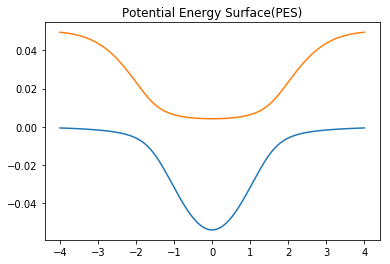

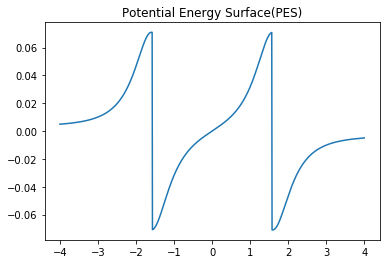

In [47]:
plot_pes(2,-4,4)
plot_nac(2,-4,4)